Converted GeoJSON file: C:\EGM722\egm722\green_space_project\preprocessed_geojsons\wardsPolygon.geojson


C:\Users\ellawallace\anaconda3\envs\egm722\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\ellawallace\AppData\Local\Temp\ipykernel_11108\2468165644.py:71: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  left, bottom = transform(in_proj, out_proj, liverpool_bbox_wgs84['left'], liverpool_bbox_wgs84['bottom'])
C:\Users\ellawallace\AppData\Local\Temp\ipykernel_11108\2468165644.py:72: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  right, top = transform(in_proj, out_proj, liverpool_bbox_w

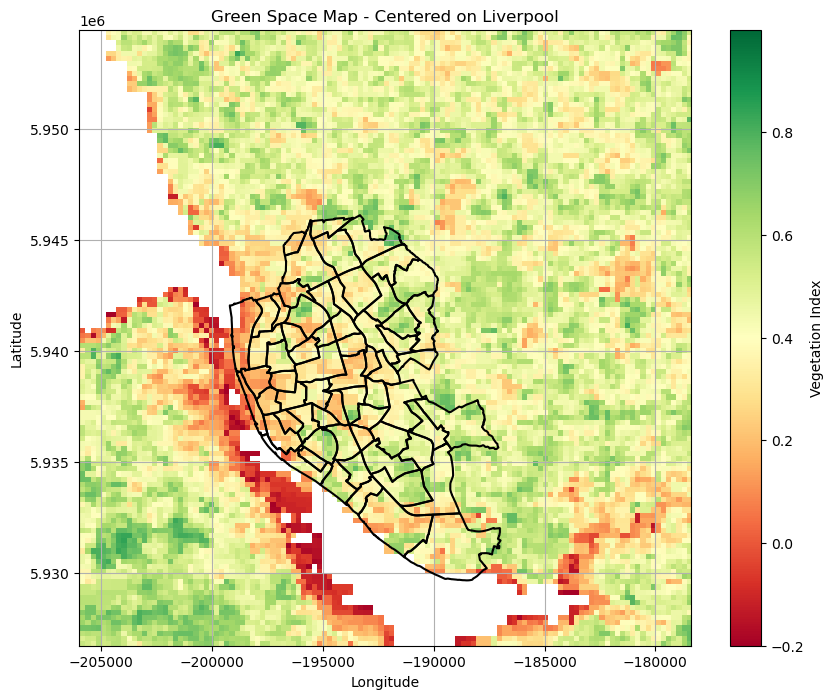

In [17]:
import os
import geopandas as gpd
import rasterio.merge
import rasterio
import matplotlib.pyplot as plt
from pyproj import Proj, transform

# Define a function to convert shapefile to GeoJSON
def shp_to_geojson(shp_file, output_dir):
    """
    Convert shapefile to GeoJSON format.

    Parameters:
        shp_file (str): Path to the shapefile.
        output_dir (str): Directory to save the output GeoJSON file.

    Returns:
        str: Path to the generated GeoJSON file.
    """
    # Open the shapefile
    gdf = gpd.read_file(shp_file)
    
    # Create the output GeoJSON file path
    output_file = os.path.join(output_dir, os.path.basename(shp_file).replace('.shp', '.geojson'))
    
    # Save the GeoJSON file
    gdf.to_file(output_file, driver='GeoJSON')
    
    return output_file

# Test

# Path to the shapefile
shp_file_path = 'C:\\EGM722\\egm722\\green_space_project\\data_files\\wardsPolygon.shp'

# Directory to store the GeoJSON files
output_geojson_dir = 'C:\\EGM722\\egm722\\green_space_project\\preprocessed_geojsons'

# Create the output directory if it doesn't exist
if not os.path.exists(output_geojson_dir):
    os.makedirs(output_geojson_dir)

# Convert shapefile to GeoJSON
geojson_file = shp_to_geojson(shp_file_path, output_geojson_dir)

# Print the path to the generated GeoJSON file
print("Converted GeoJSON file:", geojson_file)

# Define Liverpool's bounding box in WGS84 (EPSG:4326) coordinates
liverpool_bbox_wgs84 = {
    'left': -3.1,
    'right': -2.7,
    'bottom': 53.30,
    'top': 53.55
}

# Path to the merged dataset and shapefile
merged_output_path = 'C:\\EGM722\\egm722\\green_space_project\\merged_dataset.tif'
wards_shp_path = 'C:\\EGM722\\egm722\\green_space_project\\data_files\\wardsPolygon.shp'

# Open the merged dataset
with rasterio.open(merged_output_path) as src:
    data = src.read(1)  # Read the first band
    crs = src.crs
    extent = src.bounds

# Transform Liverpool's bounding box to the dataset's CRS
in_proj = Proj(init='epsg:4326')
out_proj = Proj(crs)
    
left, bottom = transform(in_proj, out_proj, liverpool_bbox_wgs84['left'], liverpool_bbox_wgs84['bottom'])
right, top = transform(in_proj, out_proj, liverpool_bbox_wgs84['right'], liverpool_bbox_wgs84['top'])
    
liverpool_bbox = {
        'left': left,
        'right': right,
        'bottom': bottom,
        'top': top
    }

# Convert the data values from -2000 to 10000 to the actual NDVI/EVI values
data = data.astype(float)  # Ensure the data is in float format
data[data == -3000] = float('nan')  # Treat the fill value as NaN
data = data / 10000.0  # Scale the data to the range of [-0.2, 1.0] for NDVI/EVI

# Plot the data
plt.figure(figsize=(10, 8))
plt.imshow(data, cmap='RdYlGn', extent=(extent.left, extent.right, extent.bottom, extent.top), origin='upper')
plt.colorbar(label='Vegetation Index')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Green Space Map - Centered on Liverpool')
plt.grid(True)

# Set the extent to zoom into Liverpool
plt.xlim(liverpool_bbox['left'], liverpool_bbox['right'])
plt.ylim(liverpool_bbox['bottom'], liverpool_bbox['top'])

# Load the wards polygon shapefile
wards = gpd.read_file(wards_shp_path)

# Ensure the shapefile is in the same CRS as the raster data
if wards.crs != crs:
    wards = wards.to_crs(crs)

# Plot the wards on top of the raster data
wards.boundary.plot(ax=plt.gca(), edgecolor='black')

plt.show()


Datasets found: 47
Granules found: 557
 Getting 10 granules, approx download size: 0.62 GB


QUEUEING TASKS | :   0%|          | 0/10 [00:00<?, ?it/s]

File MOD13Q1.A2000049.h17v03.061.2020041154633.hdf already downloadedFile MOD13Q1.A2000065.h17v03.061.2020040141727.hdf already downloaded

File MOD13Q1.A2000081.h17v03.061.2020041151126.hdf already downloaded
File MOD13Q1.A2000097.h17v03.061.2020041113105.hdf already downloaded
File MOD13Q1.A2000113.h17v03.061.2020042090654.hdf already downloaded
File MOD13Q1.A2000129.h17v03.061.2020042174718.hdf already downloaded
File MOD13Q1.A2000145.h17v03.061.2020045172657.hdf already downloaded
File MOD13Q1.A2000161.h17v03.061.2020047193150.hdf already downloaded
File MOD13Q1.A2000177.h17v03.061.2020048032507.hdf already downloaded
File MOD13Q1.A2000193.h17v03.061.2020051154432.hdf already downloaded


PROCESSING TASKS | :   0%|          | 0/10 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\ellawallace\anaconda3\envs\egm722\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\ellawallace\AppData\Local\Temp\ipykernel_11108\933099239.py:98: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  left, bottom = transform(in_proj, out_proj, liverpool_bbox_wgs84['left'], liverpool_bbox_wgs84['bottom'])
C:\Users\ellawallace\AppData\Local\Temp\ipykernel_11108\933099239.py:99: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  right, top = transform(in_proj, out_proj, liverpool_bbox_wgs

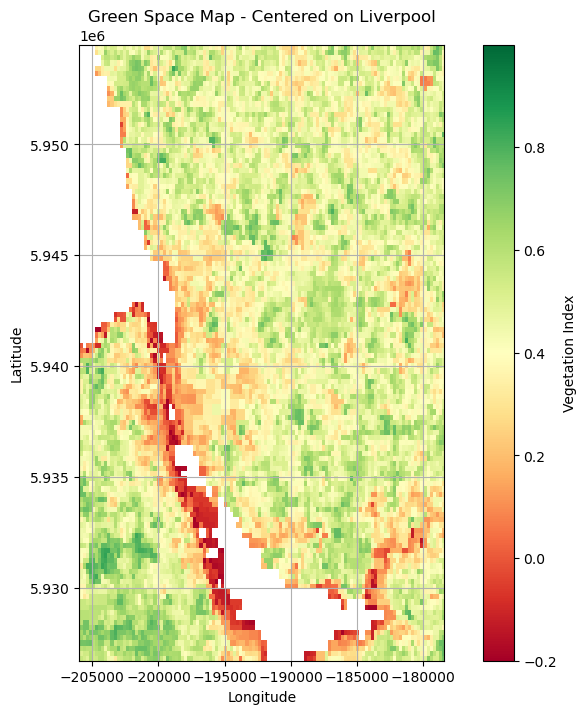

In [20]:
# Import necessary libraries
import os
import earthaccess  # For accessing and downloading Earth science data
import shapely  # For handling geometric objects
import rasterio  # For reading and writing raster data
import geopandas as gpd  # For handling geospatial data
import numpy as np
import matplotlib.pyplot as plt  # For plotting data
from pyproj import Proj, transform  # For transforming coordinate systems
from osgeo import gdal  # For handling and converting geospatial data formats

# Load ward boundaries shapefile and convert to WGS84 coordinate reference system (CRS)
wards = gpd.read_file('C:/EGM722/egm722/green_space_project/data_files/wardsPolygon.shp').to_crs(epsg=4326)

# Create a single polygon from the ward boundaries to define the search area
outline = wards['geometry'].unary_union
search_area = outline.minimum_rotated_rectangle  # Get the minimum bounding rectangle
search_area = shapely.geometry.polygon.orient(search_area, sign=1)  # Ensure the polygon vertices are in a counter-clockwise order

# Log-in and search for datasets using earthaccess
earthaccess.login(strategy='interactive', persist=True)
datasets = earthaccess.search_datasets(
    keyword='vegetation indices',  # Search for vegetation indices datasets
    polygon=search_area.exterior.coords  # Use the search area defined above
)

# Select the first dataset from the search results
dataset = datasets[0]
ds_name = dataset.get_umm('ShortName')  # Get the short name of the dataset

# Search for data granules within the dataset and the search area
results = earthaccess.search_data(
    short_name=ds_name,
    polygon=search_area.exterior.coords,
    count=10  # Limit the search to the first 10 results
)

# Create a directory for the dataset if it doesn't exist
os.makedirs(ds_name, exist_ok=True)

# Download the data granules
downloaded_files = earthaccess.download(results, ds_name)

# Define a function to convert HDF files to GeoTIFF format
def hdf_to_geotiff(hdf_file, output_dir):
    """
    Convert an HDF file to GeoTIFF format.

    Parameters:
        hdf_file (str): Path to the input HDF file.
        output_dir (str): Directory where the output GeoTIFF file will be saved.

    Returns:
        str: Path to the output GeoTIFF file.
    """
    hdf_ds = gdal.Open(hdf_file)  # Open the HDF file
    subdataset = hdf_ds.GetSubDatasets()[0][0]  # Get the first subdataset
    output_file = os.path.join(output_dir, os.path.basename(hdf_file).replace('.hdf', '.tif'))  # Define the output file path
    gdal.Translate(output_file, subdataset, format='GTiff')  # Convert the subdataset to GeoTIFF format
    return output_file  # Return the path to the output GeoTIFF file


# Convert all downloaded HDF files to GeoTIFF format
hdf_files = [file for file in os.listdir(ds_name) if file.endswith('.hdf')]
output_dir = 'C:\\EGM722\\egm722\\green_space_project\\preprocessed_geotiffs'
os.makedirs(output_dir, exist_ok=True)  # Create the output directory if it doesn't exist

geotiff_files = []
for hdf_file in hdf_files:
    geotiff_file = hdf_to_geotiff(os.path.join(ds_name, hdf_file), output_dir)
    geotiff_files.append(geotiff_file)

# Merge the GeoTIFF files into a single dataset
merged_output_path = 'C:\\EGM722\\egm722\\green_space_project\\merged_dataset.tif'
src_files_to_merge = [rasterio.open(file) for file in geotiff_files]
merged_dataset, merged_transform = rasterio.merge.merge(src_files_to_merge)
merged_crs = src_files_to_merge[0].crs  # Get the CRS of the merged dataset

# Write the merged dataset to a new GeoTIFF file
# with rasterio.open(merged_output_path, 'w', driver='GTiff',
                  # height=merged_dataset.shape[1], width=merged_dataset.shape[2],
                #   count=1, dtype=merged_dataset.dtype,
                #   crs=merged_crs, transform=merged_transform) as dst:
   # dst.write(merged_dataset[0], 1)

#Define Liverpool's bounding box in WGS84 (EPSG:4326) coordinates
liverpool_bbox_wgs84 = {'left': -3.1, 'right': -2.7, 'bottom': 53.30, 'top': 53.55}

# Open the merged dataset to read the data
with rasterio.open(merged_output_path) as src:
    data = src.read(1)  # Read the first band
    crs = src.crs  # Get the CRS of the dataset
    extent = src.bounds  # Get the extent of the dataset

# Transform Liverpool's bounding box coordinates to the CRS of the dataset
in_proj = Proj(init='epsg:4326')
out_proj = Proj(crs)
left, bottom = transform(in_proj, out_proj, liverpool_bbox_wgs84['left'], liverpool_bbox_wgs84['bottom'])
right, top = transform(in_proj, out_proj, liverpool_bbox_wgs84['right'], liverpool_bbox_wgs84['top'])
liverpool_bbox = {'left': left, 'right': right, 'bottom': bottom, 'top': top}

# Convert the data values from -2000 to 10000 to the actual NDVI/EVI values
data = data.astype(float)  # Ensure the data is in float format
data[data == -3000] = float('nan')  # Treat the fill value as NaN
data = data / 10000.0  # Scale the data to the range of [-0.2, 1.0] for NDVI/EVI

# Plot the data
plt.figure(figsize=(10, 8))
plt.imshow(data, cmap='RdYlGn', extent=(extent.left, extent.right, extent.bottom, extent.top), origin='upper')
plt.colorbar(label='Vegetation Index')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Green Space Map - Centered on Liverpool')
plt.grid(True)

# Set the extent to zoom into Liverpool
plt.xlim(liverpool_bbox['left'], liverpool_bbox['right'])
plt.ylim(liverpool_bbox['bottom'], liverpool_bbox['top'])

# Load the wards polygon shapefile and convert to the dataset's CRS if necessary
wards = gpd.read_file('C:\\EGM722\\egm722\\green_space_project\\data_files\\wardsPolygon.shp')
if wards.crs != crs:
    wards = wards.to_crs(crs)

# Plot the ward boundaries on top of the raster data
wards.boundary.plot(ax=plt.gca(), edgecolor='black')

# Show the plot
plt.show()
